<a href="https://colab.research.google.com/github/shinobu357/TugasMLRaisya/blob/main/Week%209/Week_9_Raisya_Athaya_Kamilah_101032380253_SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Gdrive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Library

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


# Importing Dataset

In [16]:
# Load dataset
file_path = '/content/drive/MyDrive/Week 9/MaterialStrength.csv'  # Sesuaikan dengan lokasi file di Colab
data = pd.read_csv(file_path)

# Lihat 5 baris pertama untuk memahami struktur dataset
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30


# Eksplorasi Data

In [18]:
# Informasi dasar tentang dataset
data.info()

# Melihat distribusi nilai pada setiap kolom
data.describe()

# Memeriksa missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


,0
x1,0
x2,0
x3,0
x4,0
x5,0
x6,0
x7,0
x8,0
x9,0
x10,0


Menampilkan tiap informasi kolom dan nilai null pada dataset. Untuk dataset ini tidak ada yang mengandung nilaii null

# Menampilkan semua nama kolom

In [ ]:
# Melihat semua nama kolom dalam dataset
print(data.columns)


Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'target_feature'],
      dtype='object')


# Encode

In [19]:
encoder = LabelEncoder()
categorical_cols = ['x14', 'x15']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

Encode Kolom kategorikal pada x14 dan x15

# Diskritisasi target menjadi kategori

In [33]:
bins = [0, 50, 100]  # Rentang kategori (sesuaikan jika diperlukan)
labels = ['Low', 'High']  # Label untuk kategori
data['target_feature_category'] = pd.cut(data['target_feature'], bins=bins, labels=labels)

# Encode kategori target menjadi numerik
data['target_encoded'] = encoder.fit_transform(data['target_feature_category'])

Membagi kolom target_feature menjadi kategori (Low, High) berdasarkan rentang nilai (bins) . Nilai target antara 0-50 akan menjadi Low . Nilai target antara 50-100 akan menjadi High . Lalu menggunakan LaelEncoder untuk mengubah kategori (Low, High) menjadi angka (0, 1)

# Split Dataset

In [32]:
X = data.drop(['target_feature', 'target_feature_category', 'target_encoded'], axis=1)
y = data['target_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mengatur atau memisahkan dataset dengan proporsi 80% training dan 20% testing. X: Semua kolom fitur kecuali kolom target (target_feature, target_feature_category, target_encoded).
y: Kolom target diskrit yang telah di-encode (target_encoded).

# Normalisasi Fitur

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Menormalisasi data agar setiap fitur memiliki skala yang sama, kemudian Menyesuaikan scaler berdasarkan data latih dan menerapkan transformasi. Dan Menerapkan transformasi yang sama pada data uj

# Training Model SVM

In [25]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

# Prediksi Model

In [26]:
# Prediksi pada data uji
y_pred = svm_model.predict(X_test_scaled)

# Evaluasi Model Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.43      0.54        44
           1       0.86      0.96      0.91       162

    accuracy                           0.84       206
   macro avg       0.80      0.69      0.72       206
weighted avg       0.83      0.84      0.83       206



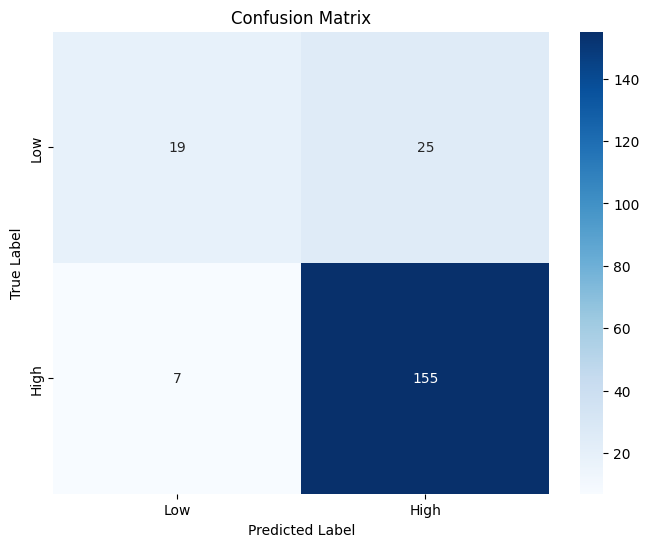

In [30]:
# Evaluasi menggunakan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Berdasarkan hasil CM terdapat berdasarkan hasil metrik, paling banyak prediksi kelas dengan benar di kelas high, serta memperoleh nilai akurasi 84% yang berarti kinerja model tersebut lumayan bagus.

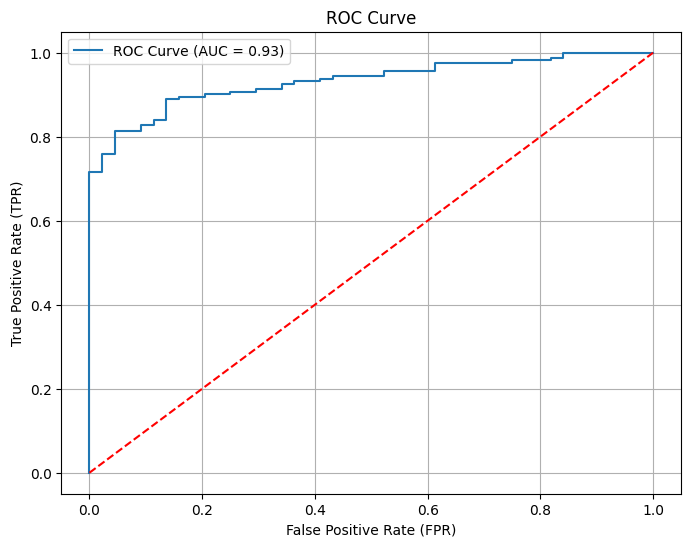

In [31]:
# Probabilitas prediksi untuk ROC Curve
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilitas kelas positif

# Hitung ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan hasil plot nilai AUC dan kurva nya , memperoleh nilai AUC nya 0.93 yang berarti model memiliki performa yang sangat baik dalam membedakan antara kelas Low dan High, dan bentuk Kurva ROC berada jauh di atas garis merah diagonal(baseline/random classifier) yang berarti menunjukkan  bahwa model lebih baik dari sekadar tebakan acak.